# Exercise sheet 5
---
**Machine Learning for Physics and Astronomy**

Semester 2, Period 5, 2021/2022

dr. Christoph Weniger, Andrea Visibile, Christiaan van Asperen, Dion Noordhuis, Kamile Lukosiute, Mathis Gerdes, Noemi Anau Montel, Silvia Cassanelli

To be handed in until **18/05/2022**

---

Total points: 25

In [124]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

## Chapter 8: Basic Deep learning - The Multi Layer Perceptron

### 1. Pytorch Basics (4 points)
In this exercise, we will be exploring some basic aspects of `pytorch`, its `autograd` functionality, and connecting the neural network theory to code. 


Consider the folloiwng simple linear model. This is equivalent to the Logistic Regression model from last week, with 5 inputs and 1 output. We now take a look at a print out of its internal parameters. Now is a good time to refamiliarize yourself with the [PyTorch documentation](https://pytorch.org/docs/stable/index.html). Before asking questions, make sure you seek solutions by searching the official documentation link provided above. 

In [125]:
model = torch.nn.Linear(5, 1)
for par in model.parameters():
  print(par, par.shape, par.grad)

print('Weight Of Network :\n',model.weight)
print('Bias Of Network :\n',model.bias)

Parameter containing:
tensor([[-0.2716, -0.2750,  0.2997,  0.4469, -0.4431]], requires_grad=True) torch.Size([1, 5]) None
Parameter containing:
tensor([0.0557], requires_grad=True) torch.Size([1]) None
Weight Of Network :
 Parameter containing:
tensor([[-0.2716, -0.2750,  0.2997,  0.4469, -0.4431]], requires_grad=True)
Bias Of Network :
 Parameter containing:
tensor([0.0557], requires_grad=True)


1. What is the mathematical definition of this model? How do the printed parameters of the model relate to the mathematical defintion, i.e. what does each parameter represent?  What is `par.grad` showing, and why is it `None`?  Why does it make sense that `requires_grad` is initialized to `True`? (1 point)

$Y = xA^T + b $ \
The 5 parameters are the weights of the network, which are $A$ in this equation.  The 1 parameter is  $b$ the bias in the model. par.grad  shows the gradient for a certain x. Since no x is given the gradient is None. The model needs a gradient therefore requires_grad is initialized to be True.

Now lets provide an input tensor $x$ for our model and compute the gradients with respect to our parameters. This is done via the `.backward()` call. 

In [126]:
x = torch.tensor([1., 2., 3., 4., 5.])

model = torch.nn.Linear(5, 1)
y = model(x)
y.backward()
for par in model.parameters():
  print(par, par.shape, par.grad)

Parameter containing:
tensor([[ 0.1003, -0.2442, -0.1983, -0.3331,  0.1217]], requires_grad=True) torch.Size([1, 5]) tensor([[1., 2., 3., 4., 5.]])
Parameter containing:
tensor([0.4280], requires_grad=True) torch.Size([1]) tensor([1.])


2. Analytically, what are the gradients that the above code calculates? This should stem from your model definition. Note that `par.grad` is no longer None. What information does `par.grad` contain? (1 point)

$y = xA^T + b$ \


$\nabla_Ay = x$ and  $\nabla_by = 1$, so the code gives us $\nabla_A$ and  $\nabla_b$

par.grad gives us $\nabla_{par} y$, where in this case $par$ is $A$ or $B$



3. Let's now switch to an ever so slightly more complex model: a multi-layer perceptron with two hidden layers (with 10 and 4 hidden neurons). What is the mathemtatical defintion of the following model, which is defined using `nn.Sequential`?  Inspect its internal parameters. How are the internal parameters of the model related to the mathematical defintion you wrote down? (1 point)

In [127]:
model2 = torch.nn.Sequential(
  torch.nn.Linear(2, 10), torch.nn.ReLU(), 
  torch.nn.Linear(10, 4), torch.nn.ReLU(), 
  torch.nn.Linear(4, 1), torch.nn.Sigmoid(),
)

In [128]:
for par in model2.parameters():
  print(par, par.shape, par.grad)

Parameter containing:
tensor([[ 0.2510, -0.1145],
        [ 0.1667, -0.4596],
        [-0.3641,  0.2218],
        [ 0.6124, -0.0209],
        [-0.2079,  0.0677],
        [-0.7055,  0.4277],
        [-0.4321, -0.2380],
        [-0.5856,  0.2083],
        [-0.3071,  0.0516],
        [-0.4307,  0.3647]], requires_grad=True) torch.Size([10, 2]) None
Parameter containing:
tensor([-0.5139, -0.5877, -0.6666,  0.6154,  0.3330, -0.4956, -0.1744,  0.5419,
         0.2167,  0.6415], requires_grad=True) torch.Size([10]) None
Parameter containing:
tensor([[-4.6783e-02, -3.0534e-02,  2.3572e-01, -1.3045e-02, -2.6929e-01,
         -7.1938e-02,  2.3431e-01,  1.3103e-01, -6.4320e-02, -3.0971e-01],
        [ 2.3229e-01, -6.8665e-02, -6.6401e-02,  2.8726e-01,  1.7233e-01,
          9.7791e-02,  1.0697e-01,  5.9374e-03,  2.3912e-02, -1.6489e-01],
        [ 1.1212e-01,  1.5618e-01,  1.7124e-01, -1.6011e-01,  1.8272e-02,
         -2.0131e-02, -1.8433e-01,  6.8568e-02,  1.7561e-01,  2.7721e-02],
        [-1.

$y = \sigma(ReLU(ReLU(xA_1^T + b_1)A_2^T +  b_2)A_3^T + b_3) $ \

First two paramaters are $A_1$ and $B_1$, second two paramaters are $A_2$ and $B_2$ and the third paramaters are $A_3$ and $B_3$.

4. Run different random tensors generated with `torch.randn(...)` through the previous model. Start with tensors of the shape (2,), (1,2),(9, 2), (2, 4, 2). How are input shapes connected to output shapes? What is the role of the last dimension and what constraints do we have there? Give one additional shape that would lead to an error when tried and explain why. (1 point)

*Hint: Consider the case of training a neural network, i.e. passing the neural network many individual examples. In that case, what do the first dimension(s) represent?*

In [129]:
x2 = torch.rand(2,)
x3 = torch.rand(1,2)
x4 = torch.rand(9,2)
x5 = torch.rand(2,4,2)
y2 = model2(x2)
y3 = model2(x3)
y4 = model2(x4)
y5 = model2(x5)
print(y2)
print(y3)
print(y4)
print(y5)


tensor([0.4941], grad_fn=<SigmoidBackward0>)
tensor([[0.4945]], grad_fn=<SigmoidBackward0>)
tensor([[0.4885],
        [0.5032],
        [0.5032],
        [0.4885],
        [0.5032],
        [0.5041],
        [0.4900],
        [0.5037],
        [0.5023]], grad_fn=<SigmoidBackward0>)
tensor([[[0.4884],
         [0.4930],
         [0.4960],
         [0.4861]],

        [[0.5030],
         [0.5034],
         [0.4969],
         [0.5033]]], grad_fn=<SigmoidBackward0>)


How are input shapes connected to output shapes? \
Number of rows are the same

What is the role of the last dimension and what constraints do we have there? \
This are number of columns. The constrained is that number of columns should be the same as the number of rows of the next layer. Otherwise matrix multiplication is not possible

Give one additional shape that would lead to an error when tried and explain why. \

x2 = torch.rand(9,3) would give an error as input, since the number of columns of the input are not equal to the number or rows of the first layer in the network and therefore matrix multiplication is not possible.

### 2. Classification! From logistic regression to classificaiton with MLPs (5 points)


This exercise will show you how to solve more complicated classification tasks using MLPs with PyTorch. Instead of the example datasets from exercise sheets 3 and 4, we will here use our own toy simulator to generate training data sets at will.  The simulator that is implemented below produces points in the 2-dim hypercube and classifies them as y = 0, 1 in a ring-segment pattern.  There are two parameters that you can play with to change that pattern. 

Below is an example code that targets this classification problem with a neural network using one (output) node with a sigmoid activation function, similar to what was used for the logistic regression in exercise sheets 3 and 4. Try to run and understand the code. 

In [130]:
torch.manual_seed(0)


In [131]:
def simulator(nsamples, contrast = 7, scale = 7):
  X = torch.rand(nsamples, 2)
  R = torch.sqrt(X[:,0]**2 + X[:,1]**2)
  p = torch.sigmoid(torch.cos(R*scale)*contrast)
  y = torch.bernoulli(p)
  return X, y

X, y = simulator(3000)  # Data set

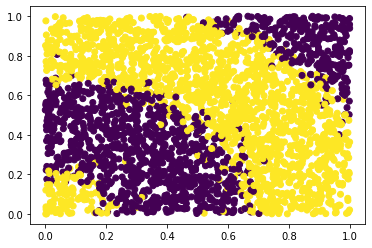

In [132]:
# This is our data
plt.scatter(X[:,0], X[:,1], c = y)

In [133]:
# We scale the coordinates to mean zero and standard deviation one, which makes it easier to train the neural networks.
X_scaled = X-X.mean(axis=0)
X_scaled = X_scaled/X_scaled.std(axis=0)

In [134]:
# This our logistic regression model with linear basis functions, using the compact `nn.Sequential` technique to define the network.
model = torch.nn.Sequential(torch.nn.Linear(2, 1), torch.nn.Sigmoid())

Here we are using the so called [Adam](https://arxiv.org/abs/1412.6980) optimizer. It's update step is slightly more sophisticated than the basic stochastic gradient descent optimizer used in the last exercise sheet. Instead of `torch.optim.SGD`, it can be accessed as `torch.otpim.Adam`. 

In [135]:
# We now define loss function and optimizer
criterion = lambda p, y: -((1-y)*torch.log(1-p) + y*torch.log(p)).sum()   # same as torch.nn.BCELoss(), note that e.g. "f = lambda x: x^2" generates a function f(x) = x^2
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)  # An alternative optimizer

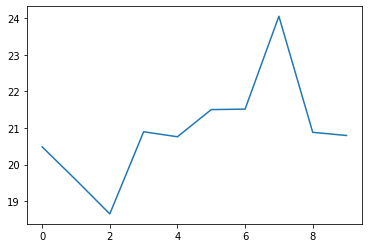

In [136]:
# This is a standard training loop
loss_hist = []
nbatch = 32  # number of training examples per minibatch
nepochs = 10 # numer of epoches, i.e. times we iterate through the entire dataset

for epoch in range(nepochs): 
  # It is important to shuffle the dataset at each epoch so that the minibatches are not always the same
  shuffle = np.random.permutation(len(X))
  X_shuffled = X_scaled[shuffle]
  y_shuffled = y[shuffle]



  for i in range(len(X)//nbatch):
    X_scaled_batch = X_shuffled[i*nbatch:(i+1)*nbatch]
    y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

    optimizer.zero_grad()

    # forward pass
    y_pred = model(X_scaled_batch).squeeze(1)

    # compute loss
    loss = criterion(y_pred, y_batch)

    # backward pass
    loss.backward()
    optimizer.step()


    
  loss_hist.append(loss.item())
plt.plot(loss_hist)

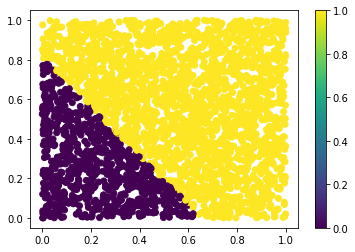

In [137]:
y_pred = model(X_scaled).squeeze(1).detach().numpy()
y_pred = np.around(y_pred)
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.colorbar()

This is actually a pretty bad result, since it does not reflect our training data.  This is not a surprise, since the simple linear regression model with linear basis functions cannot generate a pattern like our training data. We will improve now in the next steps.

1. Explain briefly (one sentence each and in your own words) the role of the following components of the training loop: `nbatch`, `//`, `zero_grad()`, `.backward()`, `optimizer.step()`? (1 point)

nbatch: During each epoch from the entire dataset minibatches are created with a number of training examples where nbatch are the number of the training examples per minibatch\
//: divide with integral result (discards remainder) \
zero_grad(): Sets the gradients of all optimized tensors to zero otherwise PyTorch accumulates the gradients\
.backward(): Computes the gradient of current tensor\
optimizer.step(): Performs a single optimization step

2. We saw above that the output of our model does not look like what we want. To judge this more quantitatively, write an accuracy function, similar to exercise sheet 2, and quantify the performance of the model using the 3000 points used for training. Use `np.around` to round the predictions of the network, compare with the truth, and calculate the fraction of matches. (1 point)

In [138]:
y = y.detach().numpy()

In [139]:
def accuracy(pred, actual):
  #rounds the prediction to compare to the actual data
  pred = np.around(pred)
  #compares to the actual data
  right_wrong = actual==pred
  #checks how many are right
  count_right = np.count_nonzero(right_wrong)

  accuracy = count_right/len(right_wrong)
  return accuracy


print('accuracy training data', accuracy(y_pred, y))

accuracy training data 0.7493333333333333


3. Improve the above model by introducing an additional hidden layer. Try out 2, 5, 25 and 100 as sizes for the single hidden layer. Use a ReLU activation function (`torch.nn.ReLU()`). How does it affect the result qualitatively? Evaluate this using the accuracy function from above. (3 points)

2


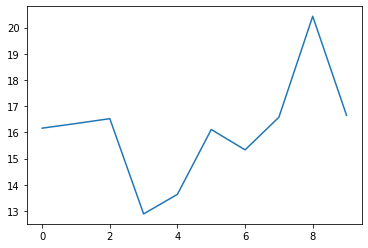

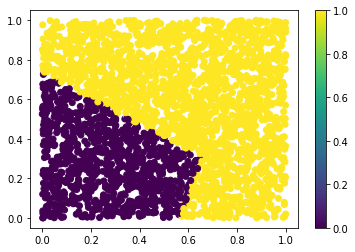

accuracy training data 0.8046666666666666
5


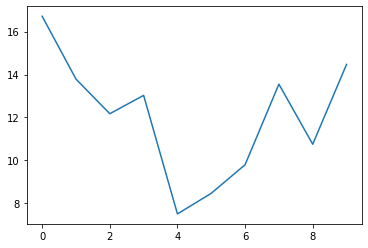

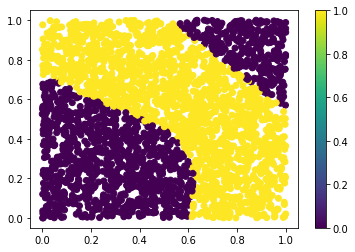

accuracy training data 0.8953333333333333
25


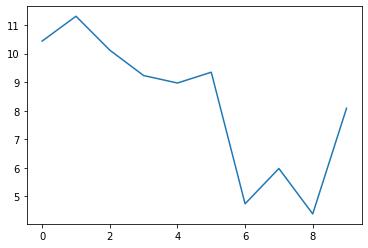

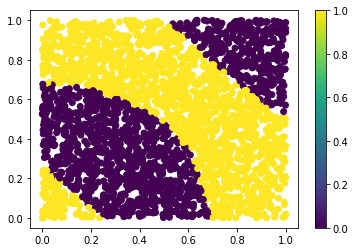

accuracy training data 0.9223333333333333
100


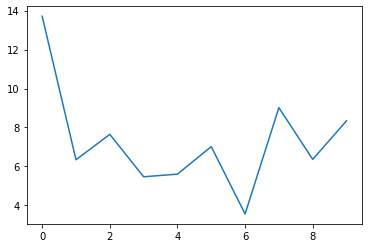

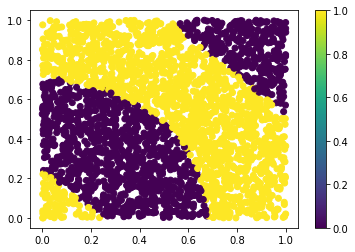

accuracy training data 0.931


In [140]:
ns = [2,5,25,100]
for n in ns:
  print(n)
  y = torch.from_numpy(y)
  
  #here this hidden layer is added with the ReLU activation function
  model = torch.nn.Sequential(torch.nn.Linear(2, n),torch.nn.ReLU(), torch.nn.Linear(n,1), torch.nn.Sigmoid())
  criterion = lambda p, y: -((1-y)*torch.log(1-p) + y*torch.log(p)).sum()   # same as torch.nn.BCELoss(), note that e.g. "f = lambda x: x^2" generates a function f(x) = x^2
  optimizer = torch.optim.Adam(model.parameters(), lr =0.01)  # An alternative optimizer

  # This is a standard training loop
  loss_hist = []
  nbatch = 32  # number of training examples per minibatch
  nepochs = 10 # numer of epoches, i.e. times we iterate through the entire dataset

  for epoch in range(nepochs): 
    # It is important to shuffle the dataset at each epoch so that the minibatches are not always the same
    shuffle = np.random.permutation(len(X))
    X_shuffled = X_scaled[shuffle]
    y_shuffled = y[shuffle]



    for i in range(len(X)//nbatch):
      X_scaled_batch = X_shuffled[i*nbatch:(i+1)*nbatch]
      y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

      optimizer.zero_grad()

      # forward pass
      y_pred = model(X_scaled_batch).squeeze(1)

      # compute loss
      loss = criterion(y_pred, y_batch)

      # backward pass
      loss.backward()
      optimizer.step()


      
    loss_hist.append(loss.item())
  plt.plot(loss_hist)
  plt.show()

  y_pred = model(X_scaled).squeeze(1).detach().numpy()
  y_pred = np.around(y_pred)
  plt.scatter(X[:,0], X[:,1], c = y_pred)
  plt.colorbar()
  plt.show()
  y = y.detach().numpy()
  print('accuracy training data', accuracy(y_pred, y))


### 3. Regression! Testing the universal function approximation theorem (5 points)


In this exercise we will use a single layer perceptron to perform regression. We will, in this way, test the universal function approximation theorem by checking if such a simple neural network can approximate the cosine function well. \\

1. Generate training data from a cosine function, `y = cos(x*4)`, with 1000 values of `x` uniformly drawn from [-1, 1]. Plot your function. (1 point)

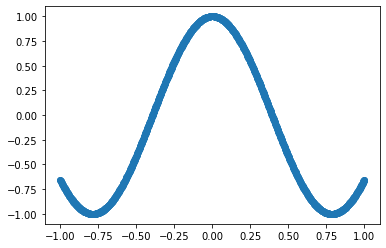

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import torch
n = 1000

def gen_cos(n):
  y = np.cos(4*n)
  return y

sigma = 0.25
x = np.linspace(-1,1,n)
y = gen_cos(x)
plt.scatter(x, y)

2. Define a network that implements a simple single-layer perceptron that maps general 1-dim inputs (x) onto general 1-dim outputs (y), with `nhidden` hidden parameters in the hidden layer. Use the ReLu activation function after the hidden layer. Instead of using `nn.Sequential` like above, complete the network class below. You have encountered this way of defining models before in section 6 A on exercise sheet 4. (2 point)

In [142]:
class SimplePerceptron(torch.nn.Module):
  def __init__(self, nhidden):
      super(SimplePerceptron, self).__init__()
      #first layer with nhidden parameters (the columns)
      self.layer1 = torch.nn.Linear(1, nhidden)
      #second layer with nhidden parameters (the rows)
      self.layer2 = torch.nn.Linear(nhidden, 1)

  def forward(self, x):
      #first layer with relu function
      x = torch.nn.functional.relu(self.layer1(x))
      #second layer
      y = self.layer2(x)
      return y


3. Train that model to recover the cosine curve. You should do so by minimizing the mean square error between the predicted function and the ground truth cosine function defined above. What is the minimum number of hidden parameters that you need for results that you would consider satisfactory? (2 points)

*Hint: Pytorch has already a pre-built MSE loss, check the documentation.  It helps to randomize the ordering of the data to improve training. Consider a minibatch size of 16 or 32, and small enough learning rate.*

In [143]:
x = np.array(x).reshape((len(x),1))
x = torch.from_numpy(x).to(torch.float)


In [144]:
y = np.array(y).reshape((len(x),1))
y = torch.from_numpy(y).to(torch.float)

0.5122493505477905
0.43915650248527527
0.5140310525894165
0.5428661108016968
0.42520493268966675
hidden layers:  2


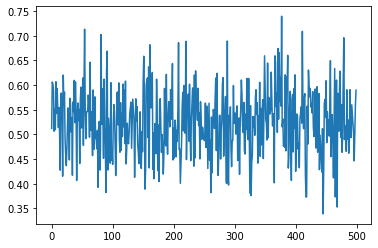

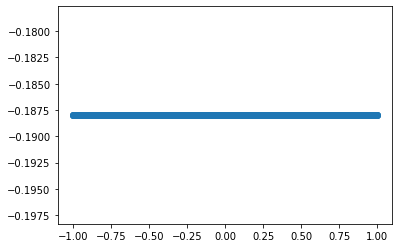

0.09340330213308334
0.0015401914715766907
0.0005723191425204277
0.0003919181181117892
0.0006055092671886086
hidden layers:  50


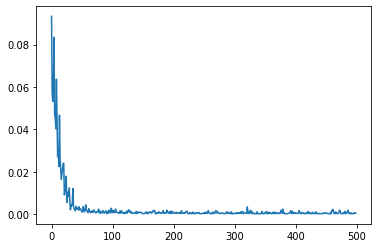

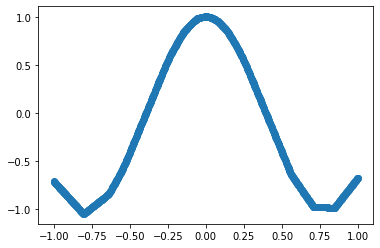

0.08441027998924255
0.0003962189657613635
0.0006259654182940722
0.0002247994125355035
0.0006702233222313225
hidden layers:  100


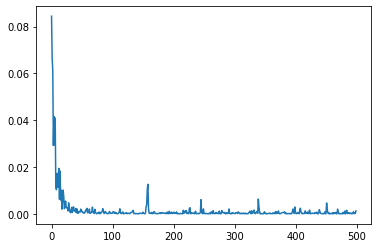

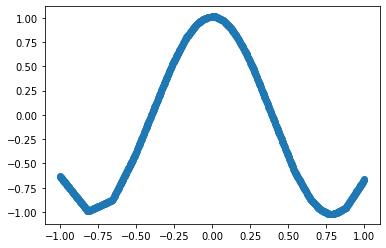

0.060033880174160004
2.2897276721778326e-05
8.757349860388786e-05
0.0011949774343520403
3.8817011954961345e-05
hidden layers:  500


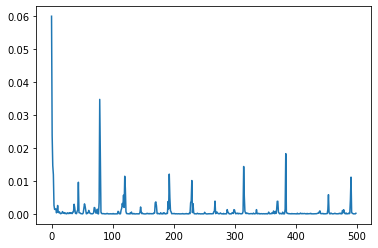

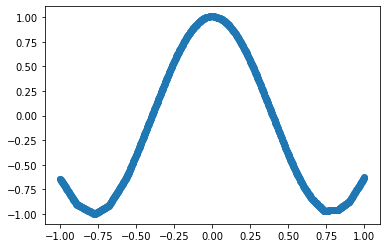

In [145]:
nhiddens = [2,50,100, 500]

for nhidden in nhiddens:
  model = SimplePerceptron(nhidden)
  criterion = torch.nn.MSELoss()

  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

  # This is a standard training loop
  loss_hist = []
  nbatch = 32  # number of training examples per minibatch
  nepochs = 500 # numer of epoches, i.e. times we iterate through the entire dataset

  model.train()
  for epoch in range(nepochs): 
    # It is important to shuffle the dataset at each epoch so that the minibatches are not always the same
    shuffle = np.random.permutation(len(x))
    x_shuffled = x[shuffle]
    y_shuffled = y[shuffle]

    for i in range(len(x)//nbatch):
      x_shuffled_batch = x_shuffled[i*nbatch:(i+1)*nbatch]
      y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

      optimizer.zero_grad()

      # forward pass
      y_pred = model(x_shuffled_batch)

      # compute loss
      loss = criterion(y_pred, y_batch)
      # backward pass
      loss.backward()
      optimizer.step()
      
    loss_hist.append(loss.item())
    if epoch% 100 == 0:
        print(loss.item())

  print('hidden layers: ', nhidden)
  plt.plot(loss_hist)
  plt.show()

  y_pred = model(x).detach().numpy()

  plt.scatter(x, y_pred)
  plt.show()

With 500 parameters inthe hidden layer, 500 epochs and minibatcges of 32 we could retrieve the orginal function quite well

## Chapter 9: Convolutional Neural Networks
In this exercise, we will be building a convolutional network in PyTorch to recognize handwritten digits as given in the MNIST dataset.

Required reading (*pior* to starting the exercises!):

https://nextjournal.com/gkoehler/pytorch-mnist (Excellent blog post on which these exercises are based)

https://en.wikipedia.org/wiki/MNIST_database (Description of the dataset we will be working with)

### 0. Using the GPU
One advantage of using pytorch as a framework is that it allows us to execute our code on the GPU. This can often greatly reduce the runtime needed to train neural networks. Below is a short description of how to do this.

If you want to try this out on Colab, you need to switch to GPU by selecting "Runtime > Change runtime type > GPU".

**Note:** Using a GPU is not required here, but it will make the code run faster. You can also complete the exercises using only the CPU.

In [146]:
import torch
# check if a GPU is available for pytorch
torch.cuda.is_available()

True

In [147]:
# we now select the device based on what is available
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

In [148]:
# let's look consider some dummy data
x = torch.tensor([0., 1., 2.])

In [149]:
# currently, the data is on the cpu
x.device

device(type='cpu')

In [150]:
# if we want to run code on the GPU, we have to move the input data to the corresponding device
x = x.to(DEVICE)

In [151]:
# we can check what device the tensor is on
x.device

device(type='cuda', index=0)

### 1. Classifying Numbers (11 pt)

Let's first initialize the random seeds.

In [152]:
import torch
# DO NOT CHANGE THIS
random_seed = 1
torch.manual_seed(random_seed)

Then we load training data.  We use here the traditional MNIST dataset, which are 28x28 images of hand-written digits between 0 and 9. 

In [153]:
import torchvision

batch_size_train = 64  # by default we use a minibatch size of 64 for training.
# You can leave it like that during the subsequent exercises.

batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize( 
                  (0.1307,), (0.3081,)),
                             
          ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),
          ])),
    batch_size=batch_size_test, shuffle=True)

1. Look up the `DataLoader` in PyTorch documentation. Explain the role of the `transform` statement in the above data loaders. What do the numbers 0.1307 and 0.3081 represent? Why do we normalize?  Why do we set `shuffle = True`? (1 point)

Explain the role of the transform statement in the above data loaders.

Transforms the data to tensors and normalize to the mean and stand deviation of the dataset, so we can compare the figures easier. So it preprocesses the code

What do the numbers 0.1307 and 0.3081 represent?

The values 0.1307 and 0.3081 used for the Normalize() transformation below are the global mean and standard deviation of the MNIST dataset.

Why do we normalize? 

So we can compare the figures more easily and so that the model can compare them better.

Why do we set shuffle = True?

It is important to shuffle the dataset at each epoch so that the batches are not always the same



The loaders act as python `generator` objects. The `list` function transforms it into a simple python list, which contains tuples of batches of example images and "targets" (the correct digit).

In [154]:
examples = list(test_loader)
example_data, example_targets = examples[0]
print(example_data.shape)
print(example_targets.shape)


torch.Size([1000, 1, 28, 28])
torch.Size([1000])


2. Explain all components of the shapes of `example_data` and `example_targets`. (1 point)

example_targets.shape = [1000] means we have 1000 figures (in total we have 10000 figures for the test data, but this is a batch).
example_data.shape = [1000, 1, 28, 28] means that we have 1000 figures of 28x28 pixels.

Let's visualize some of our test data.

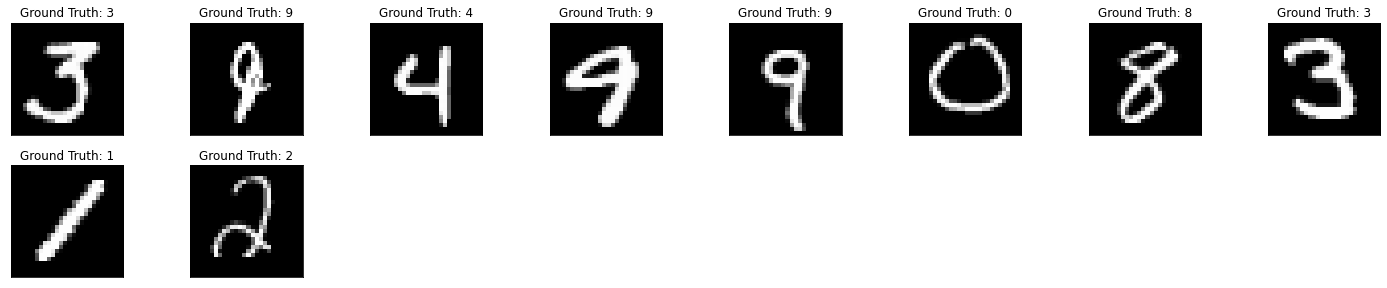

In [155]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
for i in range(10):
  plt.subplot(5,8,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

We will subsequently use the training data for training, and the test data for estimating the accuracy of our training.

The next step is to define a convolutional neural network.

3. Below you can see a diagram for a convolutional network, similar to the one you saw during the lecture. Translate this diagram into a PyTorch model by filling in the `Net` class below.

  After each max pooling step and after the first dense (linear) layer apply the relu activation function.

  You should use the modules `nn.Conv2d`, `nn.Linear` and the functions `F.max_pool2d` and `F.relu`.
  Check the PyTorch documentation for these functions to see what parameters you must provide. (3 points)

*Hint: Carefully inspect the shapes of the intermediate layers and add padding to the convolutions where necessary.*

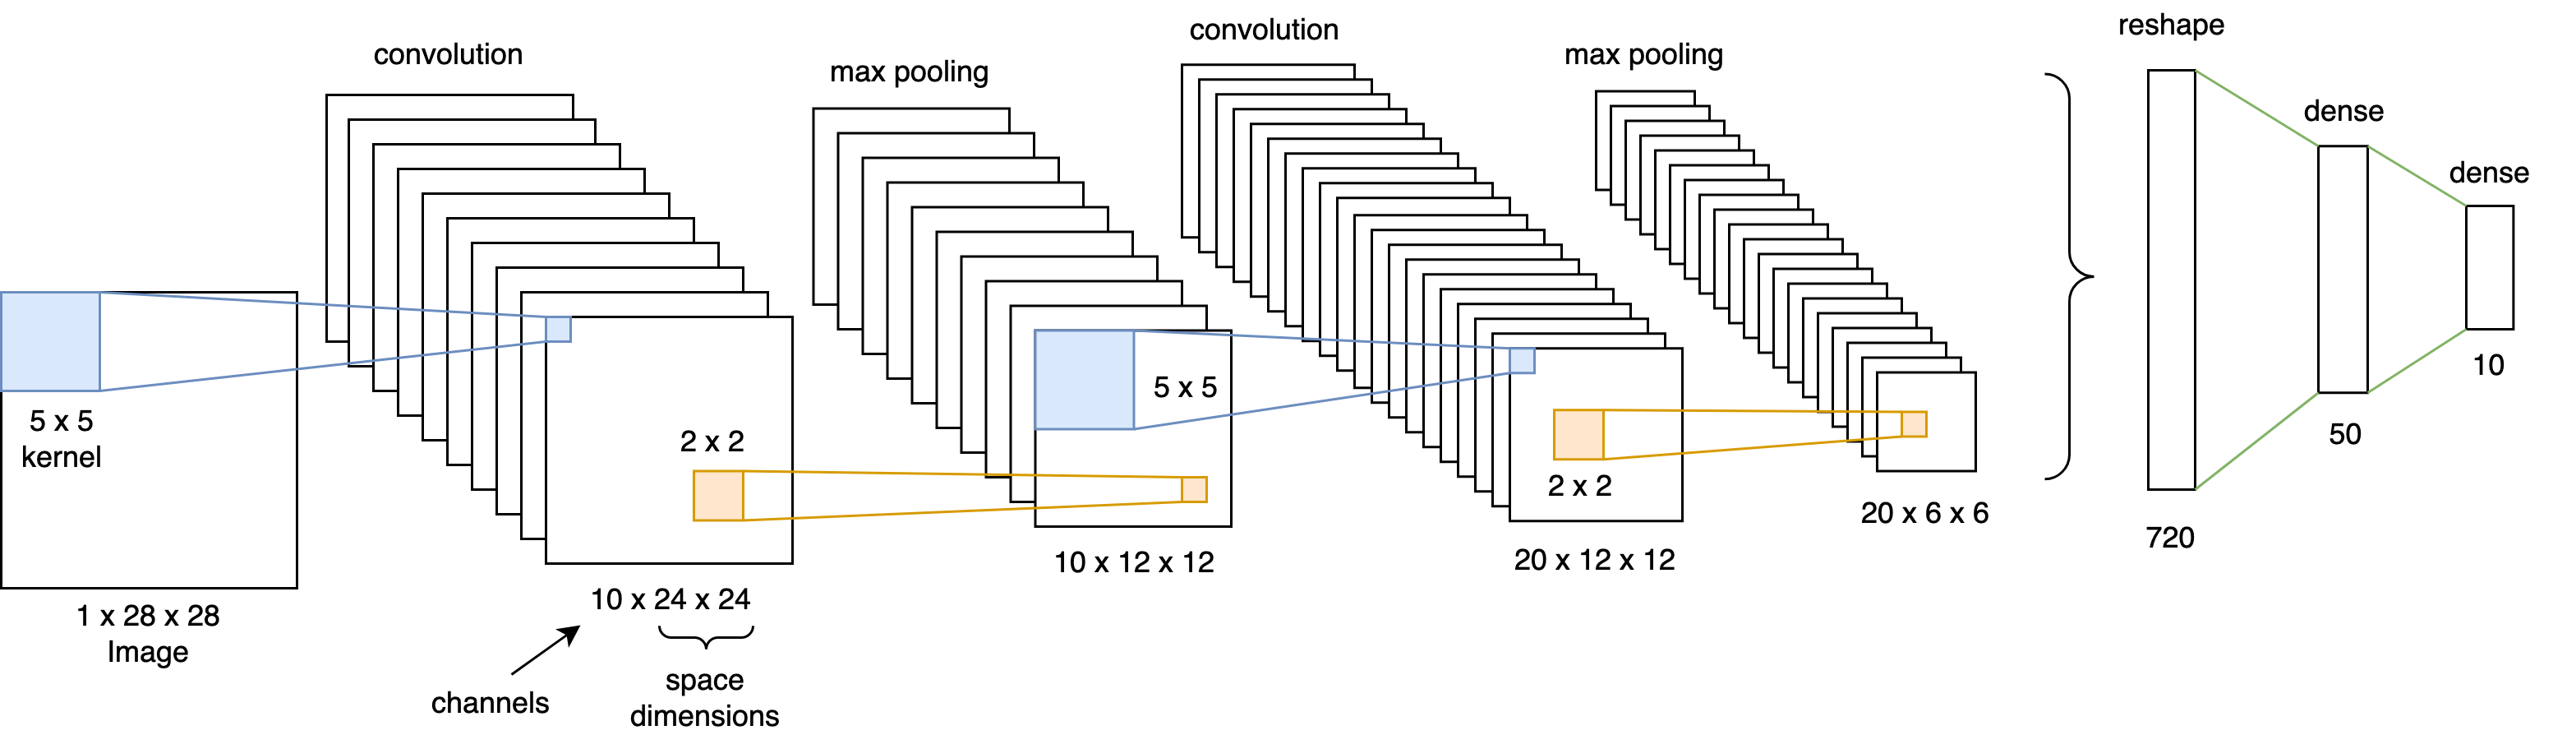

In [156]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [157]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    #dimension 1*28*28 is 1 figure is input, convolved to 10*24*24, kernel=5 because in the picture
    #here we dont have to do padding since we go from dim 28 to 24
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    #dimension 10*12*12 input, dimensie 20*12*12 output, kernel=5 because in the picture, 
    #Hin=Hout
    #Hin=12 Hout=(Hin+2×padding[0]−dilation[0]×(kernel_size[0]−1)−1)/stride[0] +1 
    #Hout=12-(5-1) =8 therfore we need a padding of 2 to get: Hout = 12 - 4 + 2*2 =12
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5, padding=2)
    #for layers see picture
    self.fc1 = nn.Linear(720, 50)
    #input size is50 output is 10 beceause there 10 numbers/possibilites
    #so they are the possibility that is a certain number
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    #first conv, then max_pool2d has 2 because see figure -> dimension goes to
    #10*12*12, afterwards relu
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    #first conv, then max_pool2d has 2 because see figure -> dimnesion goes to
    #20*6*6, afterwards relu
    x = F.relu(F.max_pool2d(self.conv2(x), 2))
    #view means reshape if you are sure of the number of columns but not about 
    #the rows then you can specify this with a -1, 720 because see figure
    x = x.view(-1, 720)
    #does fc1 and relu
    x = F.relu(self.fc1(x))
    #does fc2
    x = self.fc2(x)
    return x

Now we define the optimizer, and instantiate the network.

In [158]:
learning_rate = 0.01

network = Net().to(DEVICE)  # We move the network to the GPU
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

By default, we will use `n_epochs = 3` throughout.  Leave it like that.

In [159]:
n_epochs = 3  # 3 epochs by default.  Leave it like that throughout the subsequent exercises.

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

This is the main training loop.

In [160]:
log_interval = 10

def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.to(DEVICE)
    target = target.to(DEVICE)
    output = network(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

This is the main testing loop.

In [161]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.to(DEVICE)
      target = target.to(DEVICE)
      output = network(data)
      #print(output)
      test_loss += F.cross_entropy(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

4. Write down mathematically how the fraction of correct classifications on the test data is calculated in the above test function. (1 point)

$\frac {correct \ classifications }{len(test \ dataset)} = \frac{correct \ classificaions}{10000} $

Now let's do the training!

In [162]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3044, Accuracy: 981/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.318732
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.829528
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.360322
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.254669
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.373708
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.258514
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.120112
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.083206
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.187471
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.253854
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.157051
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.097736
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.176042
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.091243
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.053214
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.172147
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.280274
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.123740
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.061601
Train Epoch: 1 [12160/

Text(0, 0.5, 'negative log likelihood loss')

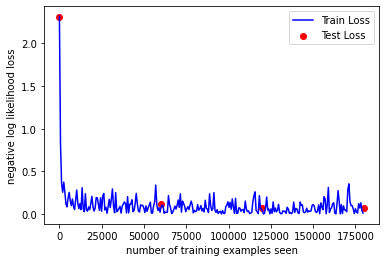

In [163]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

In [164]:
with torch.no_grad():
    output = network(example_data.to(DEVICE))

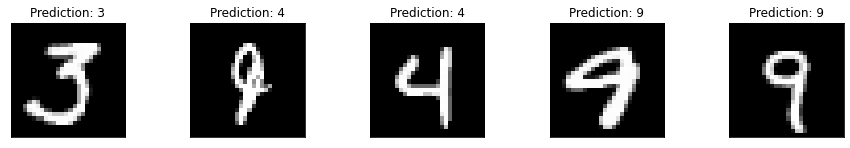

In [165]:
fig = plt.figure(figsize=(20, 10))
for i in range(5):
  plt.subplot(5,8,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
      output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])

5. Run the above code and confirm that it has an accuracy of 98% or so. Explain why the initial accuracy is around 10%. (0.5 points)

It has an accuracy of 98 %. It initial is around 10% since the network has not seen any figures yet, so it has not been tried and therfore since there are 10 numbers the accuracy will be around 10%.

6. Let's compare this to a one-layer perceptron (i.e. no hidden layers) Write a new `class Net` that flattens the 28 x 28 images, passes them through one fully connected linear layer with input size 28 times 28 and outputs a 10 dimensional one-hot vector. What is the classification accuracy in this case? Are you surprised? Discuss how the accuracy compares to the accuracy from the CNN from before. (2 points)

In [167]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2,self).__init__()
        #input size is 28*28 output is 10 beceause there 10 numbers/possibilites
        #so they are the possibility that is a certain number
        self.linear1 = nn.Linear(28*28, 10) 

    def forward(self, x):
        #view means reshape if you are sure of the number of columns but not about 
        #the rows then you can specify this with a -1. We are unsure about the rows
        #since we dont know how many figure will be passed in the function
        a = x.view(-1, 28*28)
        #puts it in linear layer
        a = self.linear1(a)
        return F.sigmoid(a)

learning_rate = 0.01

network2 = Net2().to(DEVICE)  # We move the network to the GPU
optimizer2 = optim.Adam(network2.parameters(), lr=learning_rate)

In [168]:
n_epochs = 3  # 3 epochs by default.  Leave it like that throughout the subsequent exercises.

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [169]:
log_interval = 10

def train2(epoch):
  network2.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.to(DEVICE)
    target = target.to(DEVICE)
    output = network2(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer2.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      
def test2():
  network2.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.to(DEVICE)
      target = target.to(DEVICE)
      output = network2.forward(data)
      test_loss += F.cross_entropy(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [170]:
test2()
for epoch in range(1, n_epochs + 1):
    train2(epoch)
    test2()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3242, Accuracy: 1185/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316843
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.863898
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.853210
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.987579
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.036372
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.947189
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.988854
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.842946
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.724508
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.805899
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.775763
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.907220
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.824092
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.813855
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.885035
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.822173
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.952538
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.918498
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.853795
Train Epoch: 1 [12160

What is the classification accuracy in this case? \
60% (but this differs every run)

Are you surprised? \
Would not have expected that such a simple model would score so good.

Discuss how the accuracy compares to the accuracy from the CNN from before. \
Previous model did score better (around 98%), so it is better but it also computationally more expensive, so in certain cases which are time sensitive a simple model could suffice.

7. Let's make the fitting a bit more challenging.  Define new dataloaders and insert the following statement, `torchvision.transforms.RandomRotation(180)`, at the beginning of the transform `Compose` definitions in the original defintions of `train_loader` and `test_loader` from above. Explain what this additional line does to the data.  Next, fit the data of your new dataloaders using a) the original CNN and b) the simple model we defined above. Explain why the CNN still performs well, whereas the linear layer models start to perform really badly. (2.5 points)

In [171]:
random_seed = 1
torch.manual_seed(random_seed)

import torchvision

batch_size_train = 64  # by default we use a minibatch size of 64 for training.
# You can leave it like that during the subsequent exercises.

batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.RandomRotation(180),
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize( 
                  (0.1307,), (0.3081,)),
                             
          ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.RandomRotation(180),
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),
          ])),
    batch_size=batch_size_test, shuffle=True)

examples = list(test_loader)
example_data, example_targets = examples[0]

In [172]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 4.9265, Accuracy: 4050/10000 (40%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 5.660425
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.201885
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.897735
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.746123
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.486895
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.519607
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.327177
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.453358
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.260961
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.427848
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.115885
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.951270
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.998636
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.969327
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.014527
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.767098
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.009821
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.907211
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.738124
Train Epoch: 1 [12160

In [173]:
test2()
for epoch in range(1, n_epochs + 1):
    train2(epoch)
    test2()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.2157, Accuracy: 2251/10000 (23%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.266130
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.207169
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.197048
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.154533
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.238324
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.246676
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.228593
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.256318
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.225245
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.132349
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.167463
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.252731
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.227016
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.252361
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.162912
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.292734
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.268567
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.295851
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.220644
Train Epoch: 1 [12160

Explain what this additional line does to the data: \
randomly rotates the image by angle with a maximum of 180 degress.

Explain why the CNN still performs well , whereas the linear layer models start to perform really badly \

The CNN model still performs quite well (90%), whereas the linear layer model performs quite badly (26%). This is because pooling layers (max_pool2d in my model) provide invariance to any permutation inside one cell. It results in (pseudo-)invariance to local translations. This helps when the networks needs to recongnize a pattern like the handwritten numbers instead of an exact position.